In [0]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 4.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=8d92cf1220bd6e17ea8d5ff3cd67d673643ae4403f698a2644dee57698f7a0ca
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [0]:
x = np.random.rand(6)
y = np.random.rand(6)

In [0]:
np.cov(x, y, bias=1)

array([[0.03906137, 0.02354927],
       [0.02354927, 0.10735748]])

In [0]:
np.sqrt(np.var(x))

0.19763948687898467

In [0]:
np.std(x)

0.19763948687898467

In [0]:
def regression_coef(x, y):
    cov = np.cov(x, y, bias=1)
    return cov[0, 1] / cov[0, 0]

In [0]:
def t(reg_coef, std_err):
    return (reg_coef - 0) / std_err

In [0]:
regression_coef(np.linspace(0, 1), 4*np.linspace(0, 1))

4.0

## 無相関

In [0]:
N_REPEAT = 10000
sample_sizes = list(map(int, (3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500, 2000)))

In [0]:
sample_sizes

[3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500, 2000]

In [0]:
SL = 0.05  # 優位水準

0.8637


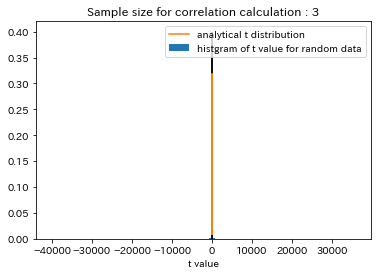

0.5936


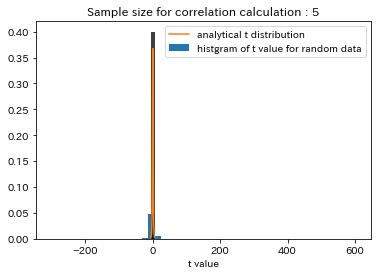

0.4741


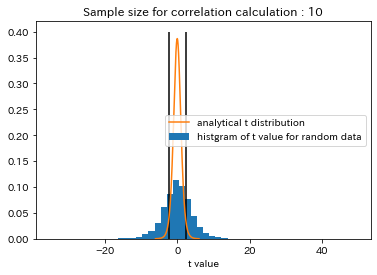

0.4439


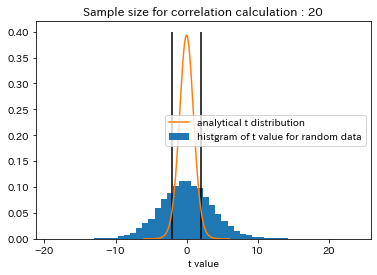

0.4353


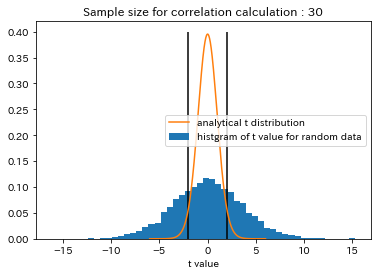

0.4352


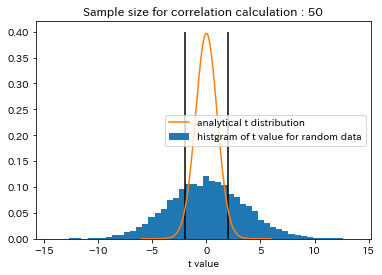

0.4338


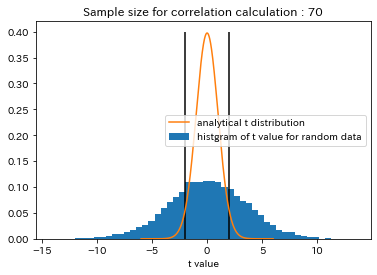

0.4334


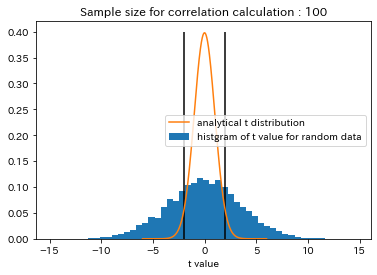

0.4361


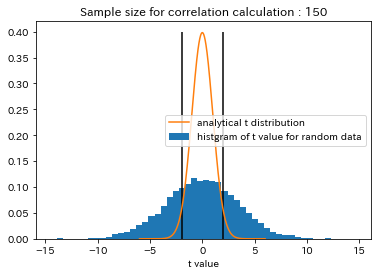

0.4266


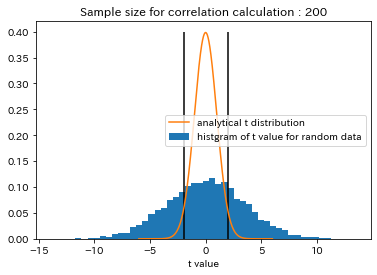

0.4222


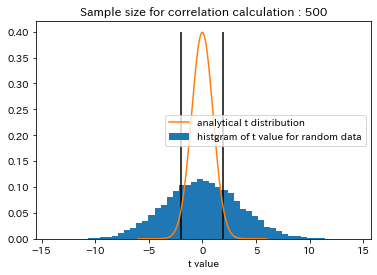

0.4432


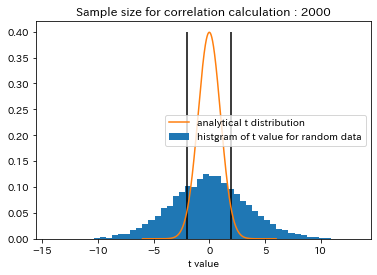

In [0]:
uncorrelated_rates = []

for sample_size in sample_sizes:
    t_vals = []
    for i in range(N_REPEAT):
        data = np.random.rand(sample_size, 2)
        x = data[:, 0]
        y = data[:, 1]

        reg_coef = regression_coef(x, y)
        t_val = t(reg_coef, np.std(x) / np.sqrt(sample_size))

        t_vals.append(t_val)

    plt.hist(t_vals, bins=50, density=True, label='histgram of t value for random data')

    x = np.linspace(-6, 6, 1000)
    plt.plot(x, stats.t.pdf(x, sample_size-2), label='analytical t distribution')

    plt.xlabel('t value')
    plt.legend()
    plt.title(f'Sample size for correlation calculation : {sample_size}')

    p_val = stats.t.ppf(1-SL/2, sample_size-2)
    uncorrelated_cnt = ((t_vals >= -p_val) & (t_vals <= p_val)).sum()
    uncorrelated_rate = uncorrelated_cnt / len(t_vals)
    print(uncorrelated_rate)
    uncorrelated_rates.append(uncorrelated_rate)

    plt.vlines([-p_val, p_val], 0, 0.4)

    plt.show()

→ ?